In [49]:
import pandas as pd
!pip install seaborn
import seaborn as sns

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open/?'
id='1nlUGyLr0JmJUbYtP2eLCp3kCubm72iBq'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('incident_event_log.csv')  
original_data = pd.read_csv('incident_event_log.csv')

In [52]:
original_data.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,cmdb_ci,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 21,29/2/2016 01:23,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 642,29/2/2016 08:53,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 804,29/2/2016 11:29,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 908,5/3/2016 12:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 746,29/2/2016 04:57,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,?,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


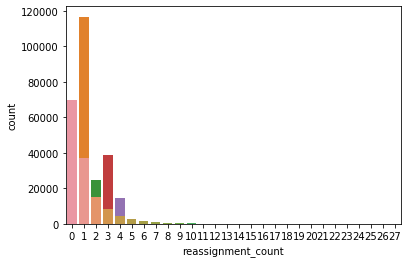

In [53]:
column=[]
for col in original_data:
  column.append(col)
for i in range(1,4):
    print(sns.countplot(x = str(column[i]), data = original_data))

In [54]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
number                     141712 non-null object
incident_state             141712 non-null object
active                     141712 non-null bool
reassignment_count         141712 non-null int64
reopen_count               141712 non-null int64
sys_mod_count              141712 non-null int64
made_sla                   141712 non-null bool
caller_id                  141712 non-null object
opened_by                  141712 non-null object
opened_at                  141712 non-null object
sys_created_by             141712 non-null object
sys_created_at             141712 non-null object
sys_updated_by             141712 non-null object
sys_updated_at             141712 non-null object
contact_type               141712 non-null object
location                   141712 non-null object
category                   141712 non-null object
subcategory                141712 non-null obj

In [55]:
original_data.describe()

,reassignment_count,reopen_count,sys_mod_count
count,141712.000000,141712.000000,141712.000000
mean,1.104197,0.021918,5.080946
std,1.734673,0.207302,7.680652
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,1.000000,0.000000,3.000000
75%,1.000000,0.000000,6.000000
max,27.000000,8.000000,129.000000


In [56]:
import numpy as np
original_data = original_data.replace("?","unknown")

df2 = original_data.replace("unknown",np.nan)
df2.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,cmdb_ci,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 21,29/2/2016 01:23,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 642,29/2/2016 08:53,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 804,29/2/2016 11:29,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 908,5/3/2016 12:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 746,29/2/2016 04:57,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


In [57]:
original_data

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,cmdb_ci,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 21,29/2/2016 01:23,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,unknown,2 - Medium,2 - Medium,3 - Moderate,Group 56,unknown,True,False,Do Not Notify,unknown,unknown,unknown,unknown,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 642,29/2/2016 08:53,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,unknown,2 - Medium,2 - Medium,3 - Moderate,Group 56,unknown,True,False,Do Not Notify,unknown,unknown,unknown,unknown,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 804,29/2/2016 11:29,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,unknown,2 - Medium,2 - Medium,3 - Moderate,Group 56,unknown,True,False,Do Not Notify,unknown,unknown,unknown,unknown,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 908,5/3/2016 12:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,unknown,2 - Medium,2 - Medium,3 - Moderate,Group 56,unknown,True,False,Do Not Notify,unknown,unknown,unknown,unknown,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 746,29/2/2016 04:57,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,unknown,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,unknown,unknown,unknown,unknown,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141707,INC0120835,Closed,False,1,0,4,True,Caller 116,Opened by 12,16/2/2017 09:09,unknown,unknown,Updated by 27,16/2/2017 09:53,Email,Location 204,Category 42,Subcategory 223,Symptom 494,unknown,2 - Medium,2 - Medium,3 - Moderate,Group 31,Resolver 10,False,True,Do Not Notify,unknown,unknown,unknown,unknown,code 9,Resolved by 9,16/2/2017 09:53,16/2/2017 09:53
141708,INC0121064,Active,True,0,0,0,True,Caller 116,Opened by 12,16/2/2017 14:17,unknown,unknown,Updated by 908,16/2/2017 14:17,Email,Location 204,Category 42,Subcategory 223,Symptom 494,unknown,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 10,False,False,Do Not Notify,unknown,unknown,unknown,unknown,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38
141709,INC0121064,Active,True,1,0,1,True,Caller 116,Opened by 12,16/2/2017 14:17,unknown,unknown,Updated by 60,16/2/2017 15:20,Email,Location 204,Category 42,Subcategory 223,Symptom 494,unknown,2 - Medium,2 - Medium,3 - Moderate,Group 31,unknown,False,False,Do Not Notify,unknown,unknown,unknown,unknown,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38
141710,INC0121064,Resolved,True,1,0,2,True,Caller 116,Opened by 12,16/2/2017 14:17,unknown,unknown,Updated by 27,16/2/2017 16:38,Email,Location 204,Category 42,Subcategory 223,Symptom 494,unknown,2 - Medium,2 - Medium,3 - Moderate,Group 31,Resolver 10,False,True,Do Not Notify,unknown,unknown,unknown,unknown,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38


In [58]:
len(original_data)

141712

In [59]:
original_data.drop(["cmdb_ci","problem_id","rfc","vendor","caused_by"],axis = 1)

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 21,29/2/2016 01:23,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,2 - Medium,2 - Medium,3 - Moderate,Group 56,unknown,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 642,29/2/2016 08:53,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,2 - Medium,2 - Medium,3 - Moderate,Group 56,unknown,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 804,29/2/2016 11:29,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,2 - Medium,2 - Medium,3 - Moderate,Group 56,unknown,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 908,5/3/2016 12:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,2 - Medium,2 - Medium,3 - Moderate,Group 56,unknown,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 746,29/2/2016 04:57,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141707,INC0120835,Closed,False,1,0,4,True,Caller 116,Opened by 12,16/2/2017 09:09,unknown,unknown,Updated by 27,16/2/2017 09:53,Email,Location 204,Category 42,Subcategory 223,Symptom 494,2 - Medium,2 - Medium,3 - Moderate,Group 31,Resolver 10,False,True,Do Not Notify,code 9,Resolved by 9,16/2/2017 09:53,16/2/2017 09:53
141708,INC0121064,Active,True,0,0,0,True,Caller 116,Opened by 12,16/2/2017 14:17,unknown,unknown,Updated by 908,16/2/2017 14:17,Email,Location 204,Category 42,Subcategory 223,Symptom 494,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 10,False,False,Do Not Notify,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38
141709,INC0121064,Active,True,1,0,1,True,Caller 116,Opened by 12,16/2/2017 14:17,unknown,unknown,Updated by 60,16/2/2017 15:20,Email,Location 204,Category 42,Subcategory 223,Symptom 494,2 - Medium,2 - Medium,3 - Moderate,Group 31,unknown,False,False,Do Not Notify,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38
141710,INC0121064,Resolved,True,1,0,2,True,Caller 116,Opened by 12,16/2/2017 14:17,unknown,unknown,Updated by 27,16/2/2017 16:38,Email,Location 204,Category 42,Subcategory 223,Symptom 494,2 - Medium,2 - Medium,3 - Moderate,Group 31,Resolver 10,False,True,Do Not Notify,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38


In [0]:
from collections import defaultdict

def create_list_from_column(original_data,name_of_list):
    one_list = original_data[name_of_list].tolist()
    return one_list

def return_sum(one_column):
    dic = defaultdict(int)
    for a in one_column:
        dic[a] += 1
    return dic

def create_dict(original_data,column_name):
    one_list = create_list_from_column(original_data,column_name)
    dic = return_sum(one_list)
    return dic

In [62]:
dict_incident = return_sum(original_data["incident_state"].tolist())
dict_incident

defaultdict(int,
            {'-100': 5,
             'Active': 38716,
             'Awaiting Evidence': 38,
             'Awaiting Problem': 461,
             'Awaiting User Info': 14642,
             'Awaiting Vendor': 707,
             'Closed': 24985,
             'New': 36407,
             'Resolved': 25751})

In [63]:
dict_active = return_sum(original_data["active"].tolist())
dict_active

defaultdict(int, {False: 24986, True: 116726})

In [64]:
dict_made_sla = create_dict(original_data,"made_sla")
dict_made_sla, len(dict_made_sla)

(defaultdict(int, {False: 9215, True: 132497}), 2)

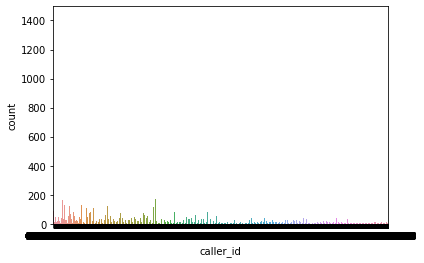

In [65]:
dict_caller_id = create_dict(original_data,"caller_id")
dict_caller_id
sns.countplot(original_data["caller_id"])

In [66]:
dict_problem_id = create_dict(original_data,"problem_id")
dict_problem_id

defaultdict(int,
            {'Problem ID  10': 16,
             'Problem ID  100': 10,
             'Problem ID  101': 2,
             'Problem ID  102': 7,
             'Problem ID  103': 10,
             'Problem ID  104': 8,
             'Problem ID  105': 2,
             'Problem ID  106': 2,
             'Problem ID  107': 2,
             'Problem ID  108': 2,
             'Problem ID  109': 2,
             'Problem ID  11': 1,
             'Problem ID  110': 21,
             'Problem ID  111': 13,
             'Problem ID  112': 2,
             'Problem ID  113': 2,
             'Problem ID  114': 8,
             'Problem ID  115': 2,
             'Problem ID  116': 4,
             'Problem ID  117': 2,
             'Problem ID  118': 7,
             'Problem ID  119': 21,
             'Problem ID  12': 6,
             'Problem ID  120': 2,
             'Problem ID  121': 7,
             'Problem ID  122': 7,
             'Problem ID  123': 2,
             'Problem ID  124': 2,


In [67]:
category=[]
for col in original_data:
  category.append(col)
for i in range(1,len(category)):
    print(len(create_dict(original_data, str(category[i]))))

9
2
28
9
115
2
5245
208
19849
186
11553
846
50664
5
225
59
255
526
51
3
3
4
79
235
2
2
2
253
182
5
4
18
217
18506
2707


In [68]:
dict_urgency = create_dict(original_data,"urgency")
dict_urgency

defaultdict(int, {'1 - High': 4020, '2 - Medium': 134094, '3 - Low': 3598})

In [69]:
dict_priority = create_dict(original_data,"priority")
dict_priority

defaultdict(int,
            {'1 - Critical': 2258,
             '2 - High': 2972,
             '3 - Moderate': 132452,
             '4 - Low': 4030})

In [0]:
import time, datetime
from datetime import datetime

def return_timestamp(cmnt_time):
    cmnt_time=datetime.strptime(str(cmnt_time),'%d/%m/%Y %H:%M')
    stamp=int(datetime.timestamp(cmnt_time))
    return stamp

In [0]:
original_data["closed_at"] = original_data["closed_at"].apply(return_timestamp)

In [0]:
original_data["opened_at"] = original_data["opened_at"].apply(return_timestamp)

In [73]:
original_data.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,cmdb_ci,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,1456708560,Created by 6,29/2/2016 01:23,Updated by 21,29/2/2016 01:23,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,unknown,2 - Medium,2 - Medium,3 - Moderate,Group 56,unknown,True,False,Do Not Notify,unknown,unknown,unknown,unknown,code 5,Resolved by 149,29/2/2016 11:29,1457179200
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,1456708560,Created by 6,29/2/2016 01:23,Updated by 642,29/2/2016 08:53,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,unknown,2 - Medium,2 - Medium,3 - Moderate,Group 56,unknown,True,False,Do Not Notify,unknown,unknown,unknown,unknown,code 5,Resolved by 149,29/2/2016 11:29,1457179200
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,1456708560,Created by 6,29/2/2016 01:23,Updated by 804,29/2/2016 11:29,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,unknown,2 - Medium,2 - Medium,3 - Moderate,Group 56,unknown,True,False,Do Not Notify,unknown,unknown,unknown,unknown,code 5,Resolved by 149,29/2/2016 11:29,1457179200
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,1456708560,Created by 6,29/2/2016 01:23,Updated by 908,5/3/2016 12:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,unknown,2 - Medium,2 - Medium,3 - Moderate,Group 56,unknown,True,False,Do Not Notify,unknown,unknown,unknown,unknown,code 5,Resolved by 149,29/2/2016 11:29,1457179200
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,1456720800,Created by 171,29/2/2016 04:57,Updated by 746,29/2/2016 04:57,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,unknown,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,unknown,unknown,unknown,unknown,code 5,Resolved by 81,1/3/2016 09:52,1457258400


In [0]:
original_data["remaining_time"] = original_data.apply(lambda x: x['closed_at'] -  x['opened_at'], axis=1)

In [75]:
original_data.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,cmdb_ci,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at,remaining_time
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,1456708560,Created by 6,29/2/2016 01:23,Updated by 21,29/2/2016 01:23,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,unknown,2 - Medium,2 - Medium,3 - Moderate,Group 56,unknown,True,False,Do Not Notify,unknown,unknown,unknown,unknown,code 5,Resolved by 149,29/2/2016 11:29,1457179200,470640
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,1456708560,Created by 6,29/2/2016 01:23,Updated by 642,29/2/2016 08:53,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,unknown,2 - Medium,2 - Medium,3 - Moderate,Group 56,unknown,True,False,Do Not Notify,unknown,unknown,unknown,unknown,code 5,Resolved by 149,29/2/2016 11:29,1457179200,470640
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,1456708560,Created by 6,29/2/2016 01:23,Updated by 804,29/2/2016 11:29,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,unknown,2 - Medium,2 - Medium,3 - Moderate,Group 56,unknown,True,False,Do Not Notify,unknown,unknown,unknown,unknown,code 5,Resolved by 149,29/2/2016 11:29,1457179200,470640
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,1456708560,Created by 6,29/2/2016 01:23,Updated by 908,5/3/2016 12:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,unknown,2 - Medium,2 - Medium,3 - Moderate,Group 56,unknown,True,False,Do Not Notify,unknown,unknown,unknown,unknown,code 5,Resolved by 149,29/2/2016 11:29,1457179200,470640
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,1456720800,Created by 171,29/2/2016 04:57,Updated by 746,29/2/2016 04:57,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,unknown,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,unknown,unknown,unknown,unknown,code 5,Resolved by 81,1/3/2016 09:52,1457258400,537600


In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
def transform_data(data,column):
    encoder = LabelEncoder()
    data[column] = encoder.fit_transform(data[column])
    data=data.fillna(-111)
    return data

In [78]:
transform_data(original_data,"number")

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,cmdb_ci,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at,remaining_time
0,0,New,True,0,0,0,True,Caller 2403,Opened by 8,1456708560,Created by 6,29/2/2016 01:23,Updated by 21,29/2/2016 01:23,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,unknown,2 - Medium,2 - Medium,3 - Moderate,Group 56,unknown,True,False,Do Not Notify,unknown,unknown,unknown,unknown,code 5,Resolved by 149,29/2/2016 11:29,1457179200,470640
1,0,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,1456708560,Created by 6,29/2/2016 01:23,Updated by 642,29/2/2016 08:53,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,unknown,2 - Medium,2 - Medium,3 - Moderate,Group 56,unknown,True,False,Do Not Notify,unknown,unknown,unknown,unknown,code 5,Resolved by 149,29/2/2016 11:29,1457179200,470640
2,0,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,1456708560,Created by 6,29/2/2016 01:23,Updated by 804,29/2/2016 11:29,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,unknown,2 - Medium,2 - Medium,3 - Moderate,Group 56,unknown,True,False,Do Not Notify,unknown,unknown,unknown,unknown,code 5,Resolved by 149,29/2/2016 11:29,1457179200,470640
3,0,Closed,False,0,0,4,True,Caller 2403,Opened by 8,1456708560,Created by 6,29/2/2016 01:23,Updated by 908,5/3/2016 12:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,unknown,2 - Medium,2 - Medium,3 - Moderate,Group 56,unknown,True,False,Do Not Notify,unknown,unknown,unknown,unknown,code 5,Resolved by 149,29/2/2016 11:29,1457179200,470640
4,1,New,True,0,0,0,True,Caller 2403,Opened by 397,1456720800,Created by 171,29/2/2016 04:57,Updated by 746,29/2/2016 04:57,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,unknown,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,unknown,unknown,unknown,unknown,code 5,Resolved by 81,1/3/2016 09:52,1457258400,537600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141707,24916,Closed,False,1,0,4,True,Caller 116,Opened by 12,1487236140,unknown,unknown,Updated by 27,16/2/2017 09:53,Email,Location 204,Category 42,Subcategory 223,Symptom 494,unknown,2 - Medium,2 - Medium,3 - Moderate,Group 31,Resolver 10,False,True,Do Not Notify,unknown,unknown,unknown,unknown,code 9,Resolved by 9,16/2/2017 09:53,1487238780,2640
141708,24917,Active,True,0,0,0,True,Caller 116,Opened by 12,1487254620,unknown,unknown,Updated by 908,16/2/2017 14:17,Email,Location 204,Category 42,Subcategory 223,Symptom 494,unknown,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 10,False,False,Do Not Notify,unknown,unknown,unknown,unknown,code 6,Resolved by 9,16/2/2017 16:38,1487263080,8460
141709,24917,Active,True,1,0,1,True,Caller 116,Opened by 12,1487254620,unknown,unknown,Updated by 60,16/2/2017 15:20,Email,Location 204,Category 42,Subcategory 223,Symptom 494,unknown,2 - Medium,2 - Medium,3 - Moderate,Group 31,unknown,False,False,Do Not Notify,unknown,unknown,unknown,unknown,code 6,Resolved by 9,16/2/2017 16:38,1487263080,8460
141710,24917,Resolved,True,1,0,2,True,Caller 116,Opened by 12,1487254620,unknown,unknown,Updated by 27,16/2/2017 16:38,Email,Location 204,Category 42,Subcategory 223,Symptom 494,unknown,2 - Medium,2 - Medium,3 - Moderate,Group 31,Resolver 10,False,True,Do Not Notify,unknown,unknown,unknown,unknown,code 6,Resolved by 9,16/2/2017 16:38,1487263080,8460


In [0]:
category =[]
for col in original_data:
  category.append(col)
for i in range(0,len(category)):
    if original_data[str(category[i])].dtypes == "O":
        transform_data(original_data,str(category[i]))
    elif original_data[str(category[i])].dtypes == "bool":
        transform_data(original_data,str(category[i]))

In [80]:
original_data

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,cmdb_ci,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at,remaining_time
0,0,7,1,0,0,0,1,1462,200,1456708560,151,7416,104,33112,3,43,46,69,501,50,1,1,2,47,234,1,0,0,252,181,4,3,12,51,12244,1457179200,470640
1,0,8,1,0,0,2,1,1462,200,1456708560,151,7416,509,33150,3,43,46,69,501,50,1,1,2,47,234,1,0,0,252,181,4,3,12,51,12244,1457179200,470640
2,0,8,1,0,0,3,1,1462,200,1456708560,151,7416,658,33241,3,43,46,69,501,50,1,1,2,47,234,1,0,0,252,181,4,3,12,51,12244,1457179200,470640
3,0,6,0,0,0,4,1,1462,200,1456708560,151,7416,762,41838,3,43,46,69,501,50,1,1,2,47,234,1,0,0,252,181,4,3,12,51,12244,1457179200,470640
4,1,7,1,0,0,0,1,1462,120,1456720800,58,7417,605,33113,3,62,30,112,352,50,1,1,2,63,223,1,0,0,252,181,4,3,12,196,40,1457258400,537600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141707,24916,6,0,1,0,4,1,168,9,1487236140,185,11552,160,11949,1,104,32,120,368,50,1,1,2,23,0,0,1,0,252,181,4,3,16,205,4297,1487238780,2640
141708,24917,1,1,0,0,0,1,168,9,1487254620,185,11552,762,11950,1,104,32,120,368,50,1,1,2,63,0,0,0,0,252,181,4,3,13,205,4298,1487263080,8460
141709,24917,1,1,1,0,1,1,168,9,1487254620,185,11552,468,11951,1,104,32,120,368,50,1,1,2,23,234,0,0,0,252,181,4,3,13,205,4298,1487263080,8460
141710,24917,8,1,1,0,2,1,168,9,1487254620,185,11552,160,11952,1,104,32,120,368,50,1,1,2,23,0,0,1,0,252,181,4,3,13,205,4298,1487263080,8460


In [81]:
original_data["incident_state"].dtypes

dtype('int64')

In [0]:
X = original_data.iloc[:,:-1]

y = original_data["remaining_time"]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y)

In [83]:
from sklearn.tree import DecisionTreeRegressor

def return_precision(algorithme, X_train, X_test, Y_train, Y_test):
    algo= algorithme.fit(X_train, Y_train)
    score= algo.score(X_test, Y_test)
    return score

hp = {"max_features":29, "max_depth":50,}
model = DecisionTreeRegressor(**hp)
score = return_precision(model, X_train, X_test, Y_train, Y_test)
score

0.9959112504125867

In [84]:
X = original_data.iloc[:,:-1]

y = original_data["remaining_time"]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y)

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

def return_precision(algorithme, X_train, X_test, Y_train, Y_test):
    algo= algorithme.fit(X_train, Y_train)
    score= algo.score(X_test, Y_test)
    return score

hp = {"n_estimators":30, "max_features":29, "max_depth":  50,}
model = RandomForestRegressor(**hp)
score = return_precision(model, X_train, X_test, Y_train, Y_test)
score

0.9991139799534082

In [85]:
X = original_data.iloc[:,:-1]

y = original_data["remaining_time"]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y)

from sklearn.ensemble import AdaBoostRegressor

def return_precision(algorithme, X_train, X_test, Y_train, Y_test):
    algo= algorithme.fit(X_train, Y_train)
    score= algo.score(X_test, Y_test)
    return score

hp = { "loss" : "square","n_estimators" : 50}
model = AdaBoostRegressor(**hp)
score = return_precision(model, X_train, X_test, Y_train, Y_test)
score

0.7008573558566766

Text(0.5, 1.0, 'Variable Importances')

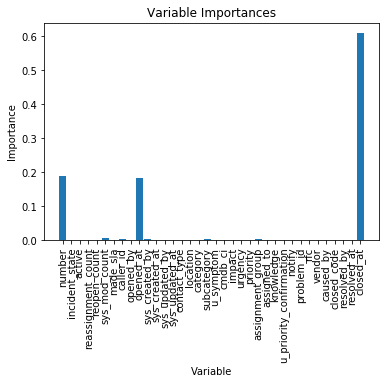

In [86]:
import matplotlib.pyplot as plt

variables_importantes = list(model.feature_importances_)
x_values = list(range(len(variables_importantes)))
plt.bar(x_values, variables_importantes, orientation = 'vertical')
plt.xticks(x_values, original_data.columns, rotation='vertical')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances')

In [0]:
original_data = original_data.drop(["reassignment_count","reopen_count","made_sla","opened_by","sys_created_by",
               "sys_created_at","sys_updated_by","contact_type","location","category",
               "subcategory","u_symptom","impact","urgency","priority","knowledge",
               "notify","closed_code","resolved_by"],axis = 1)

In [88]:
X = original_data.iloc[:,:-1]

y = original_data["remaining_time"]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y)

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

def return_precision(algorithme, X_train, X_test, Y_train, Y_test):
    algo= algorithme.fit(X_train, Y_train)
    score= algo.score(X_test, Y_test)
    return score

hp = {"max_features":10, "max_depth":50}
model = DecisionTreeRegressor(**hp)
score = return_precision(model, X_train, X_test, Y_train, Y_test)
score

0.998587906695128

In [89]:
X = original_data.iloc[:,:-1]

y = original_data["remaining_time"]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y)

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

def get_score(algorithme, X_train, X_test, Y_train, Y_test):
    algo= algorithme.fit(X_train, Y_train)
    score= algo.score(X_test, Y_test)
    return score

hp = {"n_estimators": 25, "max_features":10, "max_depth":50}
model = RandomForestRegressor(**hp)
score = get_score(model, X_train, X_test, Y_train, Y_test)
score

0.9993261965315889